# ZMS  Pitu Case - Julia

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kiedy-ruina-=-RUINA-?" data-toc-modified-id="Kiedy-ruina-=-RUINA-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kiedy ruina = RUINA ?</a></span></li><li><span><a href="#Weryfikacja-hipotez-i-wyznaczanie-parametrów" data-toc-modified-id="Weryfikacja-hipotez-i-wyznaczanie-parametrów-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Weryfikacja hipotez i wyznaczanie parametrów</a></span></li><li><span><a href="#Wielkość-szkód" data-toc-modified-id="Wielkość-szkód-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wielkość szkód</a></span></li><li><span><a href="#Model-symulacji" data-toc-modified-id="Model-symulacji-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model symulacji</a></span></li><li><span><a href="#Symulacja" data-toc-modified-id="Symulacja-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Symulacja</a></span></li><li><span><a href="#Praca" data-toc-modified-id="Raport-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Praca domowa</a></span><ul class="toc-item"><li><span><a href="#Zbadaj-płynność-firmy-w-zależności-od-parametrów" data-toc-modified-id="Zbadaj-płynność-firmy-w-zależności-od-parametrów-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Zbadaj płynność firmy w zależności od parametrów</a></span></li></ul></li></ul></div>

## Kiedy ruina = RUINA ?

*opr. P. Wojewnik na podstawie:*

*„Optymalizacja portfela szkód” K. Saduś, M. Kwiecień, R. Lipiński* oraz *„Ubezpieczenia komunikacyjne firmy ABC” A. Kołota, M. Mączyńska*


Prezes zarządu zakładu ubezpieczeń PiTU S.A., Marcin R., zasłyszał, że Prezydent planuje naturalizować wszystkich chętnych z Dżydżykistanu. *No to teraz się zacznie*, pomyślał, *Dżydżykowie jeżdżą jak wariaci, wzrośnie szkodowość, a więc musimy podnieść dla nich ceny.* 

Marcin R. dzwoni do aktuariuszki – Aldony P., ale tu czeka go niespodzianka. *Mój synek zachorował... Grypa to nic wielkiego... Ale w świńskim wydaniu bywa niebezpieczna.* Marcin z bólem serca odsyła Aldonę do domu, a zlecenie dostaje Marek T., asystent Aldony. Pytanie brzmi: **czy składka 500 zł jest wystarczająca ?**

Dotychczasowe doświadczenia PiTU S.A. z Dżydżykami są następujące:

<table>
<tr></tr>
<tr><td>

| Liczba szkód    | Liczba polis
|-----------------|-------------
| 0               | 3 437
| 1               | 522
| 2               | 40
| 3               | 2
| 4               | 0
| 5               | 0

</td><td>

| Wielkość szkody | Liczba szkód
|-----------------|-------------
| -               | 0
| 100             | 0
| 200             | 2
| 500             | 27
| 1 000           | 52
| 2 000           | 115
| 5 000           | 203
| 10 000          | 106
| 20 000          | 42
| 40 000          | 14
| 50 000          | 0
| 55 000          | 0
| 60 000          | 1

</td></tr> </table>

Aldona rzuciła jeszcze przez telefon, że **liczbę szkód dobrze opisuje rozkład Poissona**, natomiast **wielkość szkód – rozkład log-normalny**. Z Marcina udało się wydusić **oczekiwaną liczbę klientów – 100** – oraz **aktualną nadwyżkę 10 000**.


**Pytania:**
1.	Jaką ustalić składkę OC, aby ruina kierowców nie była udziałem PiTU S.A.?
2.	Czy nadwyżka końcowa będzie równa początkowej?
3.	Jakie jest zagrożenie ruiną?
4.	Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01?


## Weryfikacja hipotez i wyznaczanie parametrów

In [1]:
import Pkg; Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
import Pkg; Pkg.add("Distributions")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
import Pkg; Pkg.add("HypothesisTests")
import Pkg; Pkg.add("Random")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
using Plots
using Distributions
using HypothesisTests
using Random

In [5]:
liczba_szkod = Dict(0 => 3437,
                1 => 522,
                2 => 40,
                3 => 2,
                4 => 0, 
                5 => 0);

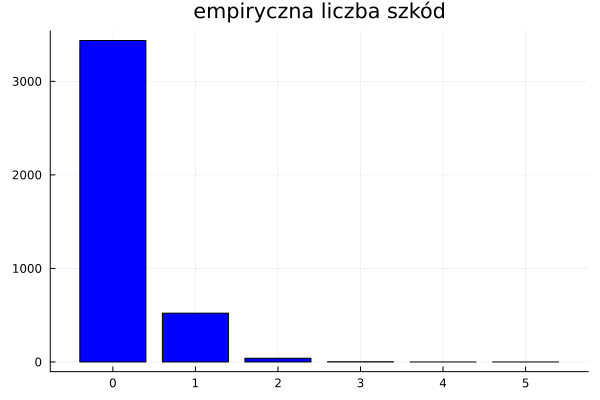

In [6]:
# Średnia liczba szkód:
liczba_polis = sum(values(liczba_szkod))
srednia_liczba_szkod = (sum([x * y for (x, y) in liczba_szkod]) / 
                        liczba_polis)

# Czy liczba szkód ma faktycznie rozkład Poissona?
poiss = Poisson(srednia_liczba_szkod)
k = length(liczba_szkod)-1
poisson_test = pdf.(poiss, 0:k) * liczba_polis

bar(liczba_szkod, fillcolor = :blue, legend=false, title= "empiryczna liczba szkód")

In [7]:
println(srednia_liczba_szkod)
println(pdf.(poiss, 0:k))
println(liczba_szkod)
println([liczba_szkod[i] for i in 0:k])
print(poisson_test)

0.1519620094976256
[0.85902091475733, 0.1305385444070124, 0.009918449762492322, 0.0005024091856698595, 1.9086777361114376e-5, 5.80093008525747e-7]
Dict(0 => 3437, 4 => 0, 5 => 0, 2 => 40, 3 => 2, 1 => 522)
[3437, 522, 40, 2, 0, 0]
[3436.9426799440776, 522.2847161724566, 39.68371749973178, 2.0101391518651077, 0.07636619622181862, 0.002320952127111514]

In [8]:
#ok. 85% osoób bedzie miało 0 wypadków

In [9]:
#[3437, 522, 40, 2, 0, 0] ->
#[3436.9426799440776, 522.2847161724566, 39.68371749973178, 2.0101391518651077, 0.07636619622181862, 0.002320952127111514] -> prognozy
#rozkład Poisson jest widocznie dobrze dopasowany, ponieważ te liczby zostały wygenerowane z tego rozkładu xd

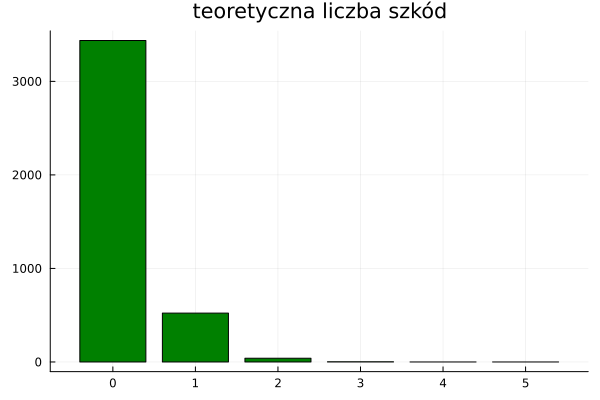

In [10]:
bar(0:k, poisson_test, fillcolor = :green, legend = false, title = "teoretyczna liczba szkód")

In [11]:
# Test chi-kwadrat z biblioteki HypothesisTests pomoże odpowiedziec na pytanie
χ = ChisqTest([liczba_szkod[i] for i in 0:k],poisson_test/sum(poisson_test));
pval = pvalue(χ)
println("p-value=",pval)
if pval > 0.05
    print("Brak podstaw do odrzucenia hipotezy zerowej")
else
    print("Należy odrzucić hipotezę zerową")
end

p-value=0.9999022759058723
Brak podstaw do odrzucenia hipotezy zerowej

## Wielkość szkód

In [12]:
szkody = [parse(Int,x[2]) for x in split.(readlines("./szkody.txt"), ';')];

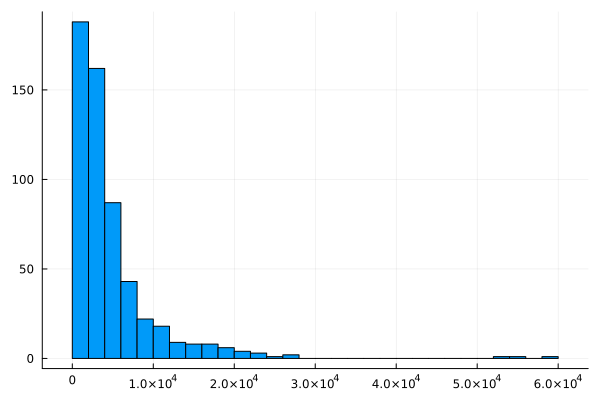

In [13]:
histogram(szkody, legend = false, bins = 50)

In [14]:
println("Średnia wielkość szkod: ", round(mean(szkody)))

Średnia wielkość szkod: 4742.0


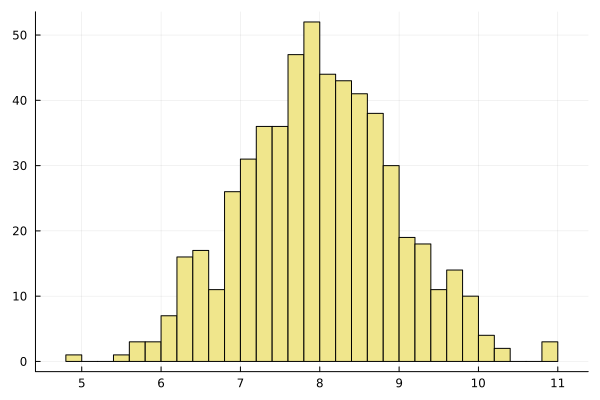

In [15]:
# Wielkość szkód ma rozkład log-normalny:
szkody_ln = log.(szkody);
histogram(szkody_ln, fillcolor=:khaki, legend = false, bins = 50)

In [16]:
# ... czy faktycznie? test Kolmogorova-Smirnova - test do sprawdzania czy rozklad normalny
#lepiej uzyc shapiro-wilka
kstest = ExactOneSampleKSTest(szkody_ln, Normal(mean(szkody_ln), std(szkody_ln)))
kspval = pvalue(kstest)
if kspval > 0.05
    println("p-value wyniosło:", kspval, 
           "\nBrak więc podstaw do odrzucenia hipotezy " *
           "o log-normalności rozkładu zmiennej")
else
    println("należy odrzucic hipotezę zerowa")
end

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests ~/.julia/packages/HypothesisTests/zKkJv/src/kolmogorov_smirnov.jl:68


p-value wyniosło:0.9970804174500004
Brak więc podstaw do odrzucenia hipotezy o log-normalności rozkładu zmiennej


In [17]:
#potrzebujemy parametry tego rozkladu na później, z logarytmu tych szkód
#
# Parametry wielkości szkód potrzebne do symulacji:
SR_SZKODA_LN = mean(szkody_ln)
STD_SZKODA_LN = std(szkody_ln);

In [18]:
LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100 #załozenie do projektu
HORYZONT = 2 # Długość obowiązywania umowy - zakładamy 2 lata #założeni do projektu

2

## Model symulacji

In [19]:
function model(liczba_klientow::S, 
                srednia_liczba_szkod::T, 
                sr_szkoda_ln::T, 
                std_szkoda_ln::T, 
                horyzont::S, 
                nadwyzka::T, 
                skladka::T;
                seed::S=-1) where {T<:AbstractFloat, S<:Int} #domyślna wartość to -1

    # Common Random Numbers aby móc porównać różne scenariusze:
    seed == -1 || Random.seed!(seed) #-1 nie będzie porównywalnosci, trzeba ustawic inne żeby była powtarzalność
    #|| - OR, czyli albo to jest spełnione, albo to po prawej
    #dobrze ustawić ziarno

    # Definiujemy daty umów klientów w symulacji:
    daty_umow = [rand(1:365) for i in 1:liczba_klientow]
    kalendarz_wplat = zeros(Int,365)
    for dataUmowy in daty_umow
        kalendarz_wplat[dataUmowy] += 1
    end
    # Liczymy liczbę szkód przypadających na jednego klienta:
    liczba_szkod_klienta = rand(Poisson(srednia_liczba_szkod),liczba_klientow)
    
    # Ustalamy daty wypłaty dla wszystkich polis:
    kalendarz_wyplat = zeros(Int,365*horyzont) 
    for k in 1:liczba_klientow
        for s in 1:liczba_szkod_klienta[k]
            data_wyplaty = daty_umow[k] + rand(1:365) #symulujemy 1rok polisy, jeden cykl życia polisy
            kalendarz_wyplat[data_wyplaty] += 1
        end
    end
    
    # Analiza wyników firmy dla danego horyzontu czasowego i danych szkód:
    for dzien in 1:365*horyzont
        dzien ≤ 364 && (nadwyzka += kalendarz_wplat[dzien] * skladka)
        liczba_wyplat = kalendarz_wyplat[dzien]
        odszkodowania = sum(exp.(rand(Normal(sr_szkoda_ln,std_szkoda_ln),liczba_wyplat)))
        nadwyzka -= odszkodowania
        nadwyzka ≤ 0 && return nadwyzka #można zakomentować, wtedy nie trzeba wysokiej nadwyżki ustawiać - tylko mozna komentowac dla 3 podejścia
    end
    return nadwyzka
end

model (generic function with 1 method)

In [20]:
for i in 1:20
    print(rand(1:10), "-")
end

9-10-10-6-4-5-5-9-5-2-5-5-5-8-6-2-2-3-2-7-

In [21]:
function wywolanie(nadwyzka::T, skladka::T, liczba_powtorzen::S, 
              liczba_klientow::S, srednia_liczba_szkod::T, 
              sr_szkoda_ln::T, std_szkoda_ln::T, horyzont::S) where {T<:AbstractFloat,S<:Int}
    wynik = []
    for seed in 1:liczba_powtorzen
        push!(wynik, model(liczba_klientow, srednia_liczba_szkod, sr_szkoda_ln, std_szkoda_ln, horyzont, nadwyzka, skladka, seed = seed))
    end

    return (liczba_ruin = sum(wynik.<=0), p_bankructwa = sum(wynik.<0)/liczba_powtorzen, sredni_wynik = mean(wynik[wynik.>0])) #wazne w pkt 3 zeby pozwolic sie kręcic po 0
end   

wywolanie (generic function with 1 method)

## Symulacja

In [22]:
nadwyzka = 10000.0:10000.0:10000.0
skladka = 500.0:100.0:1000.0

500.0:100.0:1000.0

In [63]:
# zmienne i parametry w modelu:
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 

LICZBA_POWTORZEN = 100

for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    println("Nadwyzka: ", nd, " Skladka: ", skl, 
              " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",
              round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
end

Nadwyzka: 10000.0 Skladka: 500.0 Liczba ruin: 60 Średni wynik: 15777.0 Prawd_bankr: 0.6
Nadwyzka: 10000.0 Skladka: 550.0 Liczba ruin: 56 Średni wynik: 19183.0 Prawd_bankr: 0.56
Nadwyzka: 10000.0 Skladka: 600.0 Liczba ruin: 49 Średni wynik: 21174.0 Prawd_bankr: 0.49
Nadwyzka: 10000.0 Skladka: 650.0 Liczba ruin: 40 Średni wynik: 22491.0 Prawd_bankr: 0.4
Nadwyzka: 10000.0 Skladka: 700.0 Liczba ruin: 35 Średni wynik: 25476.0 Prawd_bankr: 0.35
Nadwyzka: 10000.0 Skladka: 750.0 Liczba ruin: 30 Średni wynik: 28475.0 Prawd_bankr: 0.3
Nadwyzka: 10000.0 Skladka: 800.0 Liczba ruin: 26 Średni wynik: 31786.0 Prawd_bankr: 0.26
Nadwyzka: 10000.0 Skladka: 850.0 Liczba ruin: 21 Średni wynik: 34642.0 Prawd_bankr: 0.21
Nadwyzka: 10000.0 Skladka: 900.0 Liczba ruin: 19 Średni wynik: 38709.0 Prawd_bankr: 0.19
Nadwyzka: 10000.0 Skladka: 950.0 Liczba ruin: 16 Średni wynik: 42204.0 Prawd_bankr: 0.16
Nadwyzka: 10000.0 Skladka: 1000.0 Liczba ruin: 12 Średni wynik: 45201.0 Prawd_bankr: 0.12
Nadwyzka: 10000.0 Sklad

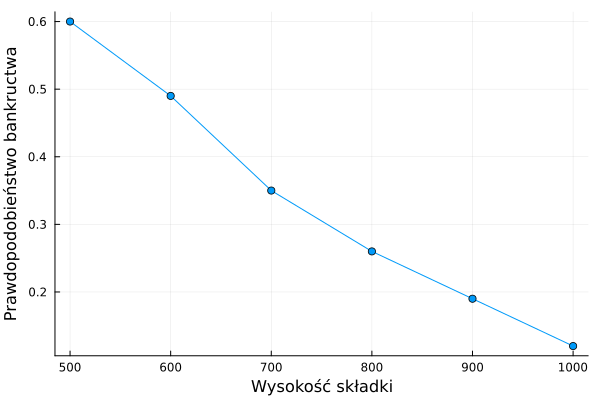

In [24]:
#ENV["GKS_ENCODING"] = "utf-8"      

plot(collect(skladka), prawd_bankr, markershape=:circle,
ylabel = "Prawdopodobieństwo bankructwa",
xlabel = "Wysokość składki",
legend = false)

## Indywidualna praca domowa

### Zbadaj płynność firmy w zależności od parametrów

---
Udziel proszę odpowiedzi na poniże pytania, uzupełniając komórki Waszym kodem Julii. Zapisz proszę uzupełniony notebook pod nazwą `[SN-ZMS_2_praca_domowa.ipynb` prześlijcie proszę na adres mzawisz@sgh.waw.pl o tytule: __[D-ZMS] 2. praca domowa__ .

__Termin oddania:__ Zgodnie z datą podaną na Teamsach. Każdy rozpoczęty dzień spóźnienia kosztuje 1 punkt mniej.

__Maksymalna liczba punktów do zdobycia:__ 5 punktów

---
**Pytania**
# Jaką ustalić składkę OC, aby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 1 parametru)


In [27]:
# miejsce na odpowiedź

In [28]:
#Przeprowadzę analizę wrażliwości jednego parametru – zmieniam wysokość składki i dla każdego robię np. 10k symulacji i sprawdzam
#Definiuję prawdopodobieństwo ruiny jako liczbę symulacji które uderzyły w zero. 
#Nawet gdyby potem wyjdziemy na plus, to jak uderzy w zero to firma w biznesie nie ma możliwości finansowania.

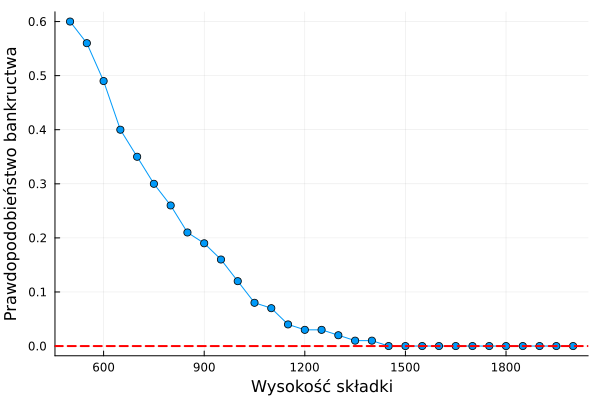

In [74]:
# zmienne i parametry w modelu:
nadwyzka = 10000.0:10000.0:10000.0
skladka = 500.0:50.0:2000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 100
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    #println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
end
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0], color=:red, lw=2, linestyle=:dash)
display(p)

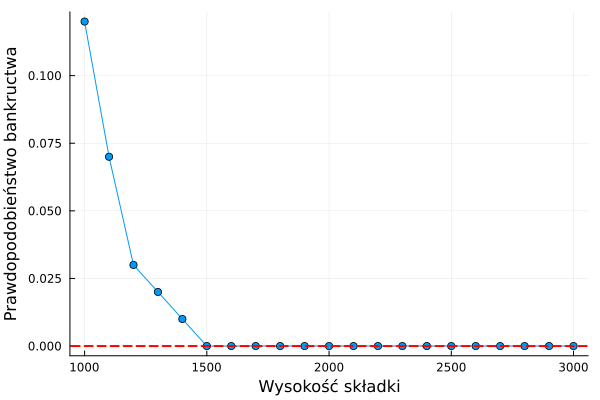

In [81]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:10000.0:10000.0
skladka = 1000.0:100.0:3000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 100

for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    #println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
end
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0], color=:red, lw=2, linestyle=:dash)
display(p)

Nadwyzka: 10000.0 Skladka: 1400.0 Liczba ruin: 1 Średni wynik: 78799.0 Prawd_bankr: 0.01


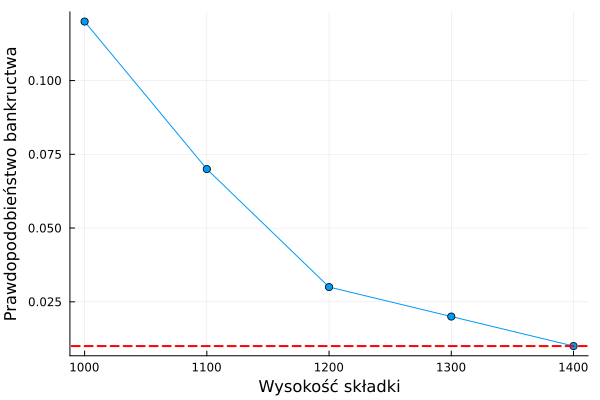

In [121]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:10000.0:10000.0
skladka = 1000.0:100.0:3000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 100
skladka_koncowa = skladka[1]
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    if wynik.p_bankructwa <= 0.01
        println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ", round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
        break
    end
    skladka_koncowa = skl
end
skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0.01], color=:red, lw=2, linestyle=:dash)
display(p)

Nadwyzka: 10000.0 Skladka: 1650.0 Liczba ruin: 99 Średni wynik: 103149.0 Prawd_bankr: 0.0099


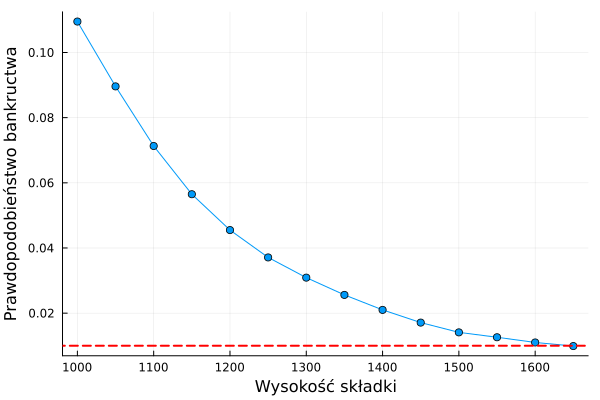

In [120]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:10000.0:10000.0
skladka = 1000.0:50.0:3000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 10000
skladka_koncowa = skladka[1]
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    if wynik.p_bankructwa <= 0.01
        println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
        break
    end
    skladka_koncowa = skl
end
skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0.01], color=:red, lw=2, linestyle=:dash)
display(p)

In [ ]:
#Dla LICZBA_POWTORZEN = 10000, składka wynosi 1650.0

Nadwyzka: 10000.0 Skladka: 1700.0 Liczba ruin: 874 Średni wynik: 108539.0 Prawd_bankr: 0.00874


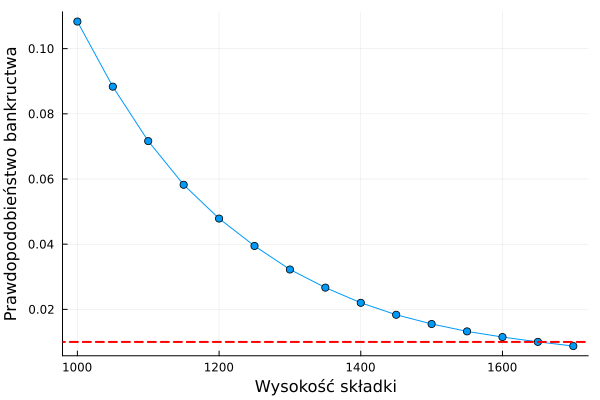

In [122]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:10000.0:10000.0
skladka = 1000.0:50.0:3000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 100000
skladka_koncowa = skladka[1]
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    if wynik.p_bankructwa <= 0.01
        println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
        break
    end
    skladka_koncowa = skl
end
skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0.01], color=:red, lw=2, linestyle=:dash)
display(p)

In [ ]:
##Dla LICZBA_POWTORZEN = 10000, składka wynosi 1700.0

Nadwyzka: 10000.0 Skladka: 1650.0 Liczba ruin: 9796 Średni wynik: 103584.0 Prawd_bankr: 0.009796


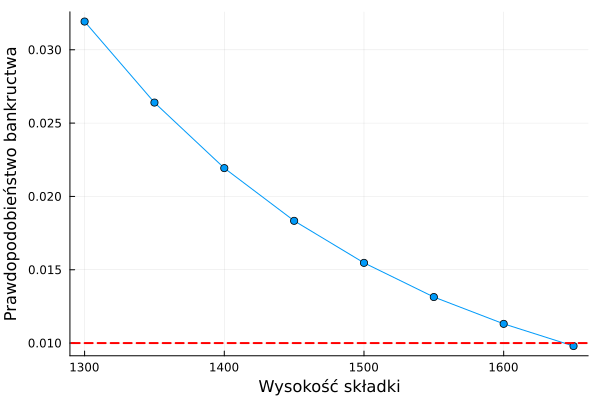

In [123]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:10000.0:10000.0
skladka = 1300.0:50.0:2000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 1000000
skladka_koncowa = skladka[1]
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    if wynik.p_bankructwa <= 0.01
        println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
        break
    end
    skladka_koncowa = skl
end
skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0.01], color=:red, lw=2, linestyle=:dash)
display(p)

Nadwyzka: 10000.0 Skladka: 1650.0 Liczba ruin: 9796 Średni wynik: 103584.0 Prawd_bankr: 0.009796


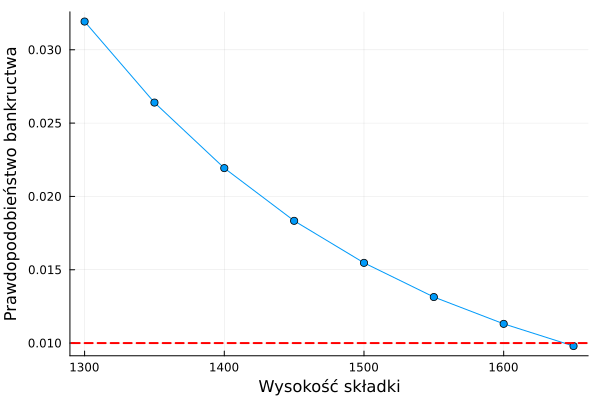

In [174]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:5000.0:20000.0
skladka = 1300.0:50.0:2000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 1000000
skladka_koncowa = skladka[1]
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    if wynik.p_bankructwa <= 0.01
        println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
        break
    end
    skladka_koncowa = skl
end
skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0.01], color=:red, lw=2, linestyle=:dash)
display(p)

In [ ]:
#Dla LICZBA_POWTORZEN = 1 000 000, składka wynosi 1650.0

In [161]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:10000.0:10000.0
skladka = 1500.0:50.0:1800.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 10000000
skladka_koncowa = skladka[1]
for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    if wynik.p_bankructwa <= 0.01
        println("Nadwyzka: ", nd, " Skladka: ", skl, " Liczba ruin: ", wynik.liczba_ruin, " Średni wynik: ",round(wynik.sredni_wynik), " Prawd_bankr: ", wynik.p_bankructwa)
        break
    end
    skladka_koncowa = skl
end
skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
hline!([0.01], color=:red, lw=2, linestyle=:dash)
display(p)

LoadError: InterruptException:

In [ ]:
#Dla LICZBA_POWTORZEN = 10 000 000, składka wynosi ...

# 2. Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 2 parametrów)


In [135]:
import Pkg; Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [138]:
using DataFrames 

In [212]:
#sprawdzam wyniki symulacji przy większej licznie powtórzeń symulacji
nadwyzka = 10000.0:500:20000.0
skladka = 1300.0:100.0:2000.0
sr_wynik = [] # Średni wynik finansowy firmy
prawd_bankr = []
liczba_ruin = [] 
LICZBA_POWTORZEN = 10000
skladka_koncowa = skladka[1]
df = DataFrame(nadwyzka=Float64[], skladka=Float64[], prawd_ruiny=Float64[])

for nd in nadwyzka, skl in skladka
    wynik = wywolanie(nd, skl, 
            LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
            srednia_liczba_szkod , SR_SZKODA_LN, 
            STD_SZKODA_LN, HORYZONT)
    push!(liczba_ruin, wynik.liczba_ruin)
    push!(prawd_bankr, wynik.p_bankructwa)
    push!(sr_wynik, wynik.sredni_wynik)
    #heatmap_data = combine(groupby(df, []))
    #end
    skladka_koncowa = skl
    push!(df,[nd, skl, wynik.p_bankructwa])
end
# skladka = skladka[1]:skladka[2]-skladka[1]:skladka_koncowa+skladka[2]-skladka[1]
# p=plot(collect(skladka), prawd_bankr, markershape=:circle, ylabel = "Prawdopodobieństwo bankructwa", xlabel = "Wysokość składki", legend = false)
# hline!([0.01], color=:red, lw=2, linestyle=:dash)
# display(p)

In [213]:
df

Row,nadwyzka,skladka,prawd_ruiny
,Float64,Float64,Float64
1,10000.0,1300.0,0.0309
2,10000.0,1400.0,0.021
3,10000.0,1500.0,0.0141
4,10000.0,1600.0,0.011
5,10000.0,1700.0,0.0087
6,10000.0,1800.0,0.0073
7,10000.0,1900.0,0.0061
8,10000.0,2000.0,0.005
9,10500.0,1300.0,0.0304


In [214]:
# print(sort(df.skladka))
# plot(
#     PlotlyJS.heatmap(
#         x=df.nadwyzka,
#         y=df.skladka,
#         z=df.prawd_ruiny,
#     ),
#     Layout(xaxis_side="top")
# )

# using Plots

using Plots
# Plots.heatmap([1,2,3,1,2,3,1,2,3],[1,1,1,2,2,2,3,3,3],[1,1,1,1,1,1,1,1,1])

Plots.heatmap(
    df.nadwyzka,
    df.skladka,
    df.prawd_ruiny
)

# Pkg.installed()

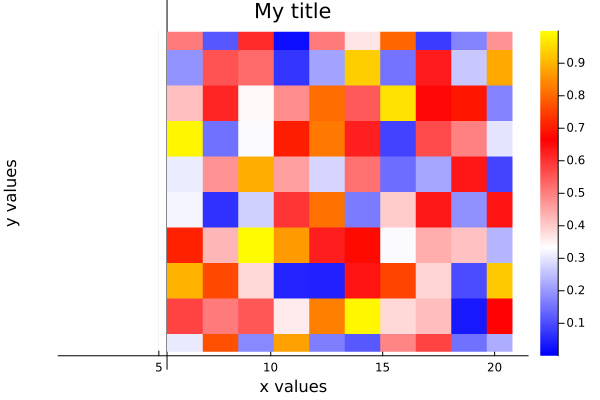

attempt to save state beyond implementation limit


In [155]:
using Plots
gr()
data = rand(21,100)
Plots.heatmap(1:size(data,1),
    1:size(data,2), data,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="x values", ylabel="y values",
    title="My title")

In [164]:
rand(1:30, 5, 3)

5×3 Matrix{Int64}:
 30  21  17
 15   2  29
 12  16  24
 21  26   8
  2   4   6

In [163]:
using PlotlyJS, Dates, Distributions

programmers = ["Alex","Nicole","Sara","Etienne","Chelsea","Jody","Marianne"]

base = Dates.now()
# Get last 180 days
dates = Dates.now() .- Dates.Day.(0:179)

z = rand(Poisson(), size(dates)[1], size(programmers)[1])

trace = PlotlyJS.heatmap(z=z, x=dates, y=programmers, colorscale="Viridis")
layout = Layout(title="Github commits per day", xaxis_nticks=36)

plot(trace, layout)

LoadError: Cannot convert GenericTrace{Dict{Symbol, Any}} to series data for plotting

In [152]:
using Plots
gr()
Plots.heatmap(df.nadwyzka, df.skladka, df.prawd_ruiny, aspect_ratio=:equal, colorbar_title="prawd_ruiny")


MethodError: MethodError: no method matching heatmap_edges(::Vector{Float64}, ::Symbol, ::Vector{Float64}, ::Symbol, ::Tuple{Int64}, ::Bool)
[0mClosest candidates are:
[0m  heatmap_edges(::AbstractVector, ::Symbol, ::AbstractVector, ::Symbol, [91m::Tuple{Int64, Int64}[39m, ::Bool) at ~/.julia/packages/Plots/B5j7d/src/utils.jl:265
[0m  heatmap_edges(::AbstractVector, ::Symbol, ::AbstractVector, ::Symbol, [91m::Tuple{Int64, Int64}[39m) at ~/.julia/packages/Plots/B5j7d/src/utils.jl:265
[0m  heatmap_edges(::AbstractVector, ::Symbol) at ~/.julia/packages/Plots/B5j7d/src/utils.jl:263
[0m  ...

In [30]:
# miejsce na odpowiedź

3. Kiedy nadwyżka końcowa będzie równa początkowej? Oszacuj na podstawie modelu regresji.

In [31]:
# miejsce na odpowiedź

4. Jak liczba symulacji wpływa na wyniki?

In [32]:
# miejsce na odpowiedź